<a href="https://colab.research.google.com/github/Tony-Y/oqmd-v1.2-dataset-for-cgnn/blob/main/CGNN_oqmd_fe_benchmark_torch1102%2Bcuda102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-21eae000-c1c2-b6c2-8a98-7fe744c4ee57)


# Install PyTorch 1.10.2 with CUDA 10.2

In [2]:
!pip uninstall -y torchvision torchaudio torchtext fastai

Found existing installation: torchvision 0.13.1+cu113
Uninstalling torchvision-0.13.1+cu113:
  Successfully uninstalled torchvision-0.13.1+cu113
Found existing installation: torchaudio 0.12.1+cu113
Uninstalling torchaudio-0.12.1+cu113:
  Successfully uninstalled torchaudio-0.12.1+cu113
Found existing installation: torchtext 0.13.1
Uninstalling torchtext-0.13.1:
  Successfully uninstalled torchtext-0.13.1
Found existing installation: fastai 2.7.9
Uninstalling fastai-2.7.9:
  Successfully uninstalled fastai-2.7.9


In [3]:
!pip install torch==1.10.2+cu102 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:39tcmalloc: large alloc 1147494400 bytes == 0x39ad0000 @  0x7f9993f4c615 0x58e046 0x4f2e5e 0x4d19df 0x51b31c 0x5b41c5 0x58f49e 0x51b221 0x5b41c5 0x58f49e 0x51837f 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4ba70a 0x538136 0x590055 0x51b180 0x5b41c5 0x58f49e 0x51837f 0x5b41c5 0x58f49e 0x51740e 0x58f2a7 0x517947 0x5b41c5 0x58f49e
     |████████████████████████████████| 881.9 MB 2.1 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113


In [4]:
!pip freeze | grep torch

torch==1.10.2+cu102
torchsummary==1.5.1


# Clone CGNN v1.0.2

In [12]:
!git clone -b v1.0.2 https://github.com/Tony-Y/cgnn.git

Cloning into 'cgnn'...
remote: Enumerating objects: 226, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 226 (delta 38), reused 54 (delta 18), pack-reused 136
Receiving objects: 100% (226/226), 2.04 MiB | 22.42 MiB/s, done.
Resolving deltas: 100% (63/63), done.
Note: checking out '15583437e0c1db175569bdb5523c718c93ce49cb'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



# Download the OQMD v1.2 Dataset

In [13]:
!wget -q "https://zenodo.org/record/7118055/files/oqmd-v1_2-for-cgnn.7z?download=1" -O oqmd.7z

In [14]:
!7z e oqmd.7z -ocgnn/OQMD *.npz *.json *.csv -r


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 74747342 bytes (72 MiB)

Extracting archive: oqmd.7z
--
Path = oqmd.7z
Type = 7z
Physical Size = 74747342
Headers Size = 363
Method = LZMA2:24
Solid = +
Blocks = 4

  0%      5% - oqmd_dataset/targets.csv                                11% - oqmd_dataset/targets.csv                                18% - oqmd_dataset/targets.csv                                26% - oqmd_dataset/targets.csv                                32% - oqmd_dataset/targets.csv

In [15]:
!ls cgnn/OQMD/

config.json  graph_data.npz  oqmd.py  README.md  split.json  targets.csv


# Train a CGNN Model

In [16]:
%pushd 'cgnn/examples/oqmd_fe_benchmark/'

/content/cgnn/examples/oqmd_fe_benchmark


['/content']

In [17]:
!bash run_oqmd.sh | tee log.txt

Device: cuda

Model: {'n_node_feat': 89, 'n_hidden_feat': 96, 'n_graph_feat': 192, 'n_conv': 4, 'n_fc': 2, 'activation': 'softplus', 'use_batch_norm': True, 'node_activation': None, 'use_node_batch_norm': False, 'edge_activation': None, 'use_edge_batch_norm': False, 'n_edge_net_feat': 16, 'n_edge_net_layers': 0, 'edge_net_activation': 'elu', 'use_edge_net_batch_norm': False, 'use_fast_edge_network': False, 'fast_edge_network_type': 0, 'use_aggregated_edge_network': False, 'edge_net_cardinality': 32, 'edge_net_width': 4, 'use_edge_net_shortcut': False, 'n_postconv_net_layers': 0, 'postconv_net_activation': 'elu', 'use_postconv_net_batch_norm': False, 'conv_bias': False, 'edge_net_bias': False, 'postconv_net_bias': False, 'full_pooling': True, 'gated_pooling': True, 'conv_type': 0, 'use_extension': False}

Optimizer: {'optim': 'adam', 'lr': 0.001, 'weight_decay': 1e-06, 'clip_value': None}

Scheduler: {'milestones': [250], 'gamma': 0.1, 'cosine_annealing': False}

Dataset: {'dataset_path

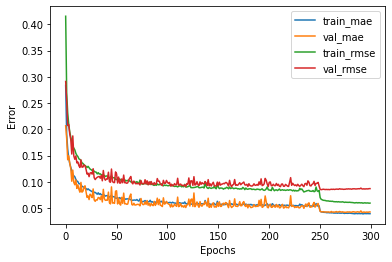

<Figure size 432x288 with 0 Axes>

In [18]:
%run '../../tools/plot_history.py'

RMSE: 0.08612316914923318
MAE: 0.04243335051803046
max_value 4.068542
min_value -4.449743


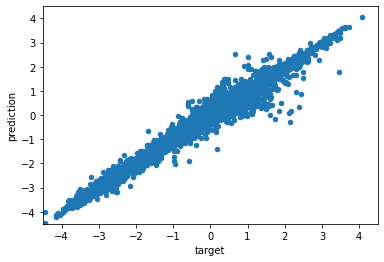

<Figure size 432x288 with 0 Axes>

In [19]:
%run '../../tools/plot_test.py'

In [20]:
%popd

/content
popd -> /content


In [21]:
!cd cgnn/examples; zip -r oqmd_fe_benchmark.zip oqmd_fe_benchmark

  adding: oqmd_fe_benchmark/ (stored 0%)
  adding: oqmd_fe_benchmark/run_oqmd.sh (deflated 41%)
  adding: oqmd_fe_benchmark/model.pth (deflated 14%)
  adding: oqmd_fe_benchmark/test_predictions.csv (deflated 59%)
  adding: oqmd_fe_benchmark/history.csv (deflated 54%)
  adding: oqmd_fe_benchmark/log.txt (deflated 86%)
